# Task 1

## Load movie reviews corpus data through sklearn

In [1]:
import sklearn
from sklearn.datasets import load_files
 
moviedir = r'C:\Users\anant\Downloads\movie_reviews\movie_reviews'
movie_data = load_files(moviedir, shuffle=True)
print('number of instances',len(movie_data.data))
print('target names',movie_data.target_names)
print('first instance\n',movie_data.data[0][:500])
# first file is in "neg" folder
print('filename of first instance =',movie_data.filenames[0])
print('class of first instance =',movie_data.target[0])

number of instances 2000
target names ['neg', 'pos']
first instance
 b"arnold schwarzenegger has been an icon for action enthusiasts , since the late 80's , but lately his films have been very sloppy and the one-liners are getting worse . \nit's hard seeing arnold as mr . freeze in batman and robin , especially when he says tons of ice jokes , but hey he got 15 million , what's it matter to him ? \nonce again arnold has signed to do another expensive blockbuster , that can't compare with the likes of the terminator series , true lies and even eraser . \nin this so cal"
filename of first instance = C:\Users\anant\Downloads\movie_reviews\movie_reviews\neg\cv405_21868.txt
class of first instance = 0


## Transform movie reviews using TFIDF vectorization

In [2]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Split data into training and test sets
reviews_train, reviews_test, y_train, y_test = train_test_split(
    movie_data.data, movie_data.target, test_size = 0.20, random_state = 12)

# Vectorize training data using TfidfVectorizer
# Remark: TfidfVectorizer = CountVectorizer+TfidfTransformer

nltk.download('stopwords')
from nltk.corpus import stopwords
vectorizer = TfidfVectorizer(
        sublinear_tf=True, 
        max_df=0.5, 
        min_df=1,  
        stop_words=stopwords.words('english'),
        use_idf=True, 
        smooth_idf=True)
X_train = vectorizer.fit_transform(reviews_train)
print("X_train n_samples: %d, n_features: %d" % X_train.shape)

# Vectorize test data using the same vectorizer

X_test = vectorizer.transform(reviews_test)
print("X_test n_samples: %d, n_features: %d" % X_test.shape)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anant\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


X_train n_samples: 1600, n_features: 35948
X_test n_samples: 400, n_features: 35948


# Task 2

## Apply Logistic Regression

In [3]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty='l2',C=1.0)

In [4]:
clf_model = clf.fit(X_train,y_train)

In [5]:
y_pred = clf.predict(X_test)
print('y_pred[:15] =',y_pred[:15])
acc = sklearn.metrics.accuracy_score(y_test, y_pred)
# precision = ability of classifier not to label as positive a sample that is negative
prec = round(sklearn.metrics.precision_score(y_test, y_pred),2)
# recall = ability of classifier to find all the positive samples
rec = round(sklearn.metrics.recall_score(y_test, y_pred),2)
f1 = round(sklearn.metrics.f1_score(y_test, y_pred),2)
print('accuracy =',acc, ' precision =', prec, ' recall =', rec, ' f1 =',f1)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('confusion matrix (rows are true counts)\n',movie_data.target_names,'\n',cm)

y_pred[:15] = [0 0 1 0 1 0 1 0 0 1 1 0 1 0 1]
accuracy = 0.8675  precision = 0.84  recall = 0.89  f1 = 0.87
confusion matrix (rows are true counts)
 ['neg', 'pos'] 
 [[174  32]
 [ 21 173]]


# Task 3

## Evaluation of model and plottinf of train and test time

In [6]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.extmath import density
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [7]:
categories =['neg','pos']

In [8]:
def benchmark(clf):
    print('_' * 80)
    print('Training:')
    print(clf)
    t0 = time.time()
    clf.fit(X_train,y_train)
    train_time = time.time() - t0
    print('train time: %0.3fs' % train_time)
    
    t0 = time.time()
    pred = clf.predict(X_test)
    test_time = time.time() - t0
    print('test time: %0.3fs' % test_time)
    
    score = metrics.f1_score(y_test,pred,average='micro')
    print('micro f1-score:  %0.3fs' % score)
    
    if hasattr(clf,'coef_'):
        print('dimensionality: %d' % clf.coef_.shape[1])
        print('density: %f' % density(clf.coef_))
        
    print('Classification report:')
    print(metrics.classification_report(y_test,pred,target_names=categories))
    
    print('confusion matrix: row: true category; column: predicted category')
    print(metrics.confusion_matrix(y_test,pred))
    
    print()
    clf_descr = str(clf)
    return clf_descr, score, train_time, test_time

In [9]:
results = []
print('=' * 80)
print('Logistic Regression with L2 Regularization')
log_reg_clf = clf
results.append(benchmark(log_reg_clf))

Logistic Regression with L2 Regularization
________________________________________________________________________________
Training:
LogisticRegression()
train time: 0.111s
test time: 0.000s
micro f1-score:  0.868s
dimensionality: 35948
density: 1.000000
Classification report:
              precision    recall  f1-score   support

         neg       0.89      0.84      0.87       206
         pos       0.84      0.89      0.87       194

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400

confusion matrix: row: true category; column: predicted category
[[174  32]
 [ 21 173]]



F1-scores
LogisticRegression():0.8675
[1.]
[0.]


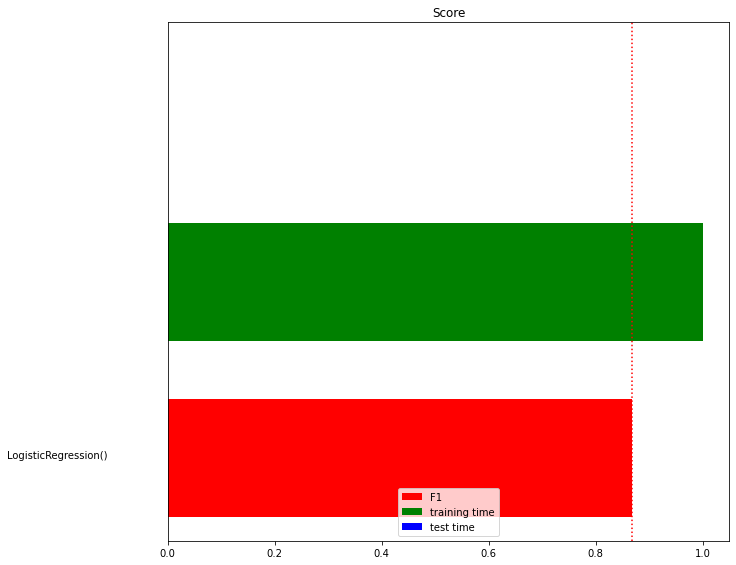

In [10]:
indices = np.arange(len(results))
results_list = [[x[i] for x in results] for i in range(4)]
clf_names, f1_val, train_time, test_time = results_list

#print f1 scores
print('F1-scores')
for i, clf_name in enumerate(clf_names):
    print(clf_name + ':'+ str(f1_val[0]))
    
#plot results 
train_time_n = np.array(train_time)/np.max(train_time)
print(train_time_n)
print(np.array(test_time))
#test_time_n = np.array(test_time)/np.max(test_time)
test_time_n = np.array(test_time)

plt.figure(figsize=(12,8))
plt.title('Score')
plt.barh(indices, f1_val, .2, label='F1', color='red')
plt.barh(indices + .3, train_time_n, .2, label='training time', color='green')
plt.barh(indices + .6, test_time_n, .2, label='test time', color='blue')
plt.yticks(())
plt.axvline(x=max(f1_val),color='r',linestyle=':')
plt.legend(loc='lower center')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)
plt.subplots_adjust(bottom=.05)

for i, c in zip(indices, clf_names):
    plt.text(-.3,0,c)
    
plt.show()

Training time for the investigated estimators
0.11119794845581055 LogisticRegression()


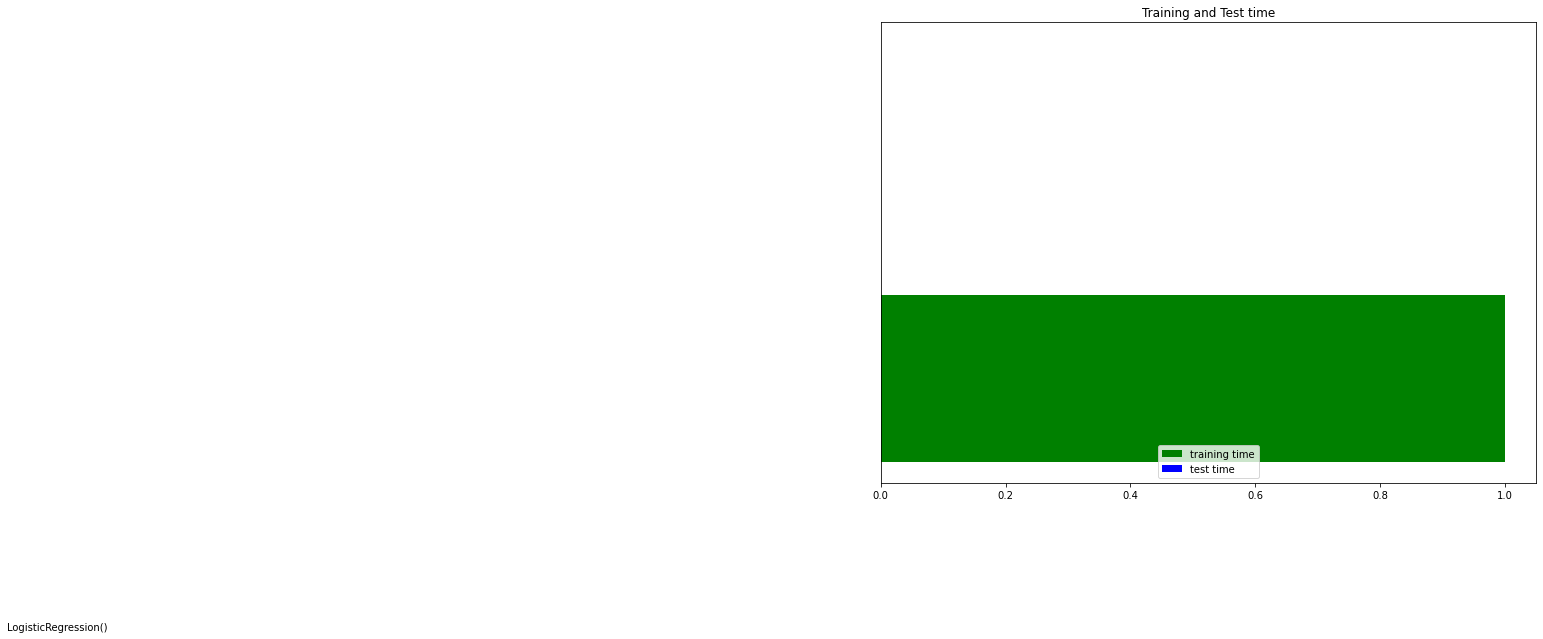

In [11]:
print('Training time for the investigated estimators')
for i in range(len(clf_names)):
    print(train_time[0], clf_names[i])
    
#plot train and test times
plt.figure(figsize=(14,8))
plt.title('Training and Test time')
plt.barh(indices + .3, train_time_n, .2, label='training time', color='green')
plt.barh(indices + .6, test_time_n, .2, label='test time', color='blue')
plt.yticks(())
plt.legend(loc='lower center')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.85)
plt.subplots_adjust(bottom=.05)

for i, c in zip(indices, clf_names):
    plt.text(-1.4,0,c)
    
plt.show()